In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from datetime import datetime

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
customer=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Python Foundation Case Study 1 - Retail Case Study/Customer.csv")
transactions=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv")
prod_info=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Case Studies/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv")



In [3]:
#Q1:Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.
#renaming column n prod_info to merge different dataframes
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)
prod_concat = pd.merge(left=transactions, right=prod_info,on=["prod_cat_code","prod_subcat_code"],how="left")

customer_final = pd.merge(left=prod_concat, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [4]:
#changing datatype of date columns to date
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])



C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-02-2014' in DD/MM/YYYY format. Provide format or specify infer_date

In [5]:
#Q2: Prepare a summary report for the merged data set.
customer_final.columns




Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [36]:
#Q2: a: Get the column names and their corresponding data types
customer_final.dtypes


transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [38]:
#Q2: b: Top/Bottom 10 observations
customer_final.head(10)
customer_final.tail(10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


In [39]:
#Q2: c: “Five-number summary” for continuous variables (min, Q1, median, Q3 and max) 
customer_final.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


In [6]:
#Q2: d: Frequency tables for all the categorical variables
customer_final.loc[:,customer_final.dtypes=="object"].describe()


,Store_type,prod_cat,prod_subcat,Gender
count,23053,23053,23053,23044
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9311,6069,3048,11811


Text(0.5, 1.0, 'Total_Amount')

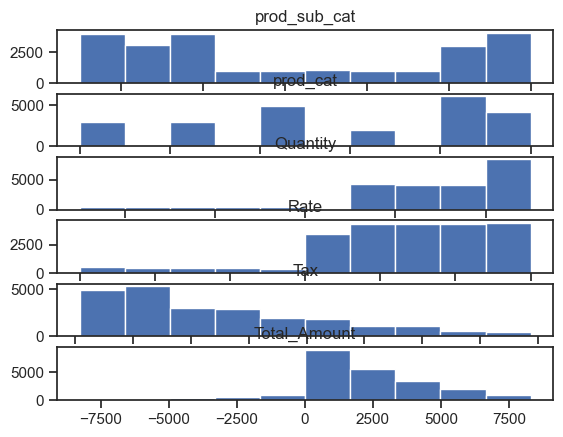

In [8]:
#Q3: Generate histograms for all continuous variables and frequency bars for categorical variables.
cust_cont_var=customer_final.loc[:,['prod_subcat_code','prod_cat_code','Qty','Rate','Tax','total_amt']]
cust_cont_var.head()
plt.subplot(6,1,1)
plt.hist(cust_cont_var.prod_subcat_code)
plt.title("prod_sub_cat")
plt.subplot(6,1,2)
plt.hist(cust_cont_var.prod_cat_code)
plt.title("prod_cat")
plt.subplot(6,1,3)
plt.hist(cust_cont_var.Qty)
plt.title("Quantity")
plt.subplot(6,1,4)
plt.hist(cust_cont_var.Rate)
plt.title("Rate")
plt.subplot(6,1,5)
plt.hist(cust_cont_var.Tax)
plt.title("Tax")
plt.subplot(6,1,6)
plt.hist(cust_cont_var.total_amt)
plt.title("Total_Amount")



C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_cat', ylabel='prod_subcat'>

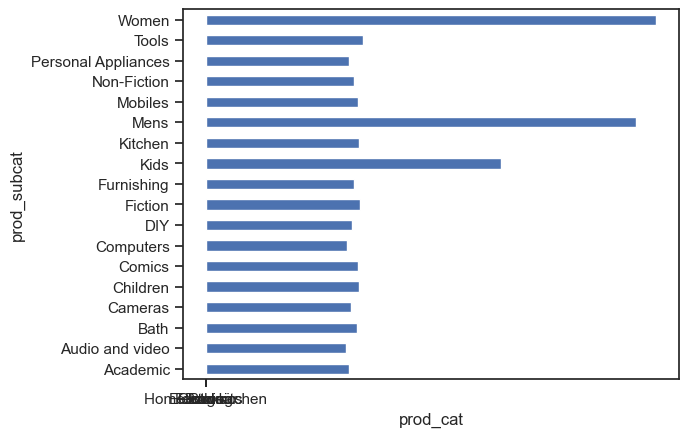

In [85]:
cat_customer = customer_final.loc[:,customer_final.dtypes=='object']
cat_customer.head()
sns.countplot(cat_customer.Gender)
sns.countplot(cat_customer.Store_type)
sns.countplot(cat_customer.prod_cat)
cat_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')



In [92]:
#Q4: a: Time period of the available transaction data
#Latest date of transaction:
customer_final["tran_date"].max()
#Earliest Transaction
customer_final["tran_date"].min()
#Time period
customer_final["tran_date"].max() - customer_final["tran_date"].min()



Timedelta('1430 days 00:00:00')

In [94]:
#Q4: b: Count of transactions where the total amount of transaction was negative
customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()

2177

In [9]:
#Q5:
customer_final.head()
male_prod=customer_final.loc[customer_final["Gender"]=='M']
male_prod.groupby('prod_cat')['prod_cat'].count().sort_values(ascending=False)
female_prod=customer_final.loc[customer_final["Gender"]=='F']
female_prod.groupby('prod_cat')['prod_cat'].count().sort_values(ascending=False)

prod_cat
Books               2949
Electronics         2328
Home and kitchen    1994
Footwear            1529
Clothing            1439
Bags                 994
Name: prod_cat, dtype: int64

In [33]:
#Q6
customer.head()
city_max=customer.groupby('city_code')['customer_Id'].count().sort_values(ascending=False).reset_index(name='Num_of_Cust')
city_max['Percentage']=(city_max['Num_of_Cust'] / sum(city_max['Num_of_Cust'])*100).round()
city_max

,city_code,Num_of_Cust,Percentage
0,3.0,595,11.0
1,5.0,586,10.0
2,4.0,582,10.0
3,7.0,575,10.0
4,2.0,564,10.0
5,8.0,562,10.0
6,10.0,558,10.0
7,1.0,551,10.0
8,9.0,546,10.0
9,6.0,526,9.0


In [42]:
#Q7
transactions.groupby('Store_type')['total_amt','Qty'].sum().round().sort_values(by='Qty',ascending=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_18052\1198880328.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  transactions.groupby('Store_type')['total_amt','Qty'].sum().round().sort_values(by='Qty',ascending=False)


,total_amt,Qty
Store_type,,
e-Shop,19824816.0,22763
MBR,9674486.0,11194
Flagship store,9715688.0,11133
TeleShop,9364781.0,10984


In [73]:
#Q8
x=prod_concat.loc[(prod_concat['Store_type']=='Flagship store') & ((prod_concat['prod_cat']=='Electronics') | (prod_concat['prod_cat']=='Clothing')),:]
x.groupby('prod_cat')['total_amt'].sum()

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: total_amt, dtype: float64

In [78]:
#Q9
customer_final.head()
x=customer_final.loc[(customer_final['Gender']=='M') & (customer_final['prod_cat']=='Electronics'),:]
x.groupby(['Gender','prod_cat'])['total_amt'].sum()

Gender  prod_cat   
M       Electronics    5703109.425
Name: total_amt, dtype: float64

In [93]:
#Q10
customer_final.head()
x=customer_final.loc[(customer_final['total_amt']>0),:]
ten_unique=x.groupby('customer_Id')['transaction_id'].count().sort_values(ascending=False).reset_index(name='No_of_Tran')
ten_unique.loc[(ten_unique['No_of_Tran']>10),:]

,customer_Id,No_of_Tran
0,272741,11
1,273014,11
2,266794,11
3,274227,11
4,270803,11
5,270535,11


In [125]:
#Q11
customer_final['Age']=(customer_final['tran_date'].dt.year-customer_final['DOB'].dt.year)
Age_Bracket=customer_final.loc[(customer_final['Age']>25)&(customer_final['Age']<35),:]
Age_Bracket
#a)
x=Age_Bracket.loc[(Age_Bracket['prod_cat']=='Electronics')|(Age_Bracket['prod_cat']=='Books'),:]
x.total_amt.sum()
#b)
tot_amt=Age_Bracket.loc[(Age_Bracket['tran_date']>'2014-01-01')&(Age_Bracket['tran_date']<'2014-03-01'),:]
tot_amt.total_amt.sum()

498201.40499999997